# Unit 1 - Modelling and Representations of Systems


### Part 2 - Laplace Transforms, Transfer Functions and S-Plane Plots

- Modelling of electrical and mechanical systems
    - Electric circuits with resistors, capacitors, inductors, op-amps
    - Translational mechanical systems
    - Rotational mechanical systems
- Simulation of a system
    - Response due to initial conditions
    - Step response
    - Response to any input
- Representations
    - Transfer function


### Part 2 - Laplace Transforms, Transfer Functions and S-Plane Plots
- Characteristics of a system
    - Settling Time
    - Maximum overshoot
    - Rise time
    - Stability
- Key Concepts
    - Poles
    - Zeros
- Plots
    - Time domain response
    - S-Plane

### Videos
Required Viewing before this lecture:
- video series on transient response

### From previous part:

Solving differential equations in time domain is tedious, however, we could do it. 

On the other hand over time people have come up with helpful tools that either:
- simplify the task of solving differential equations (for example: Laplace)
- give extra insight (for example: Fourier)
- or both! 

Key insight from transfer function representation:
- poles/zeros of a system

### Consider same example as last part

<table>
  <tr>
    <td>
      <img src="diskReadWrite.png" width="300" alt="1 Disk Graphic Diagram">
    </td>
    <td>
      <img src="1diskSimpleGraphic.png" width="100" alt="1 Disk Graphic Diagram">
    </td>
  </tr>
</table>

A torque is applied to a thin flexible rod. A disk is attached to the rod. The rod is supported by bearings on the left side of the disk. The angular position of the rod at both ends is measured. 

We will:
- Derive the transfer function between angular position of the rod at the left side ($\theta_1$) and angular position of the rod at the right side ($\theta_2$),
- Analyze pole-zero map, 
- Analyze step response of system,
- See how to simulate the output of the system for any input using Python.



### Recap from last lecture

<table>
  <tr>
    <td>
      <img src="1diskSimpleSchematic.png" width="300" alt="1 Disk Schematic Diagram">
    </td>
    <td>
      <img src="1diskSimpleFreeBody.png" width="100" alt="1 Disk Free Body Diagram">
    </td>
  </tr>
</table>

Governing differential equation that we derived in previous part:
$$
\begin{align*}
k \theta_1 = J \frac{\text{d}^2 \theta_2}{\text{dt}^2} + b \frac{\text{d} \theta_2}{\text{dt}} + k \theta_2
\end{align*}
$$

### Laplace Transform
Recall the following properties of the Laplace transform:
$$
\begin{align*}
\mathcal{L}[f'(t)] &= sF(s) - f(0) \\
\mathcal{L}[f''(t)] &= s^2F(s) -sf(0) - f(0)'
\end{align*}
$$

### In Class Activity!

Using these properties, take the Laplace transform the governing differential equation that we derived earlier:
$$
\begin{align*}
\mathcal{L}[ k \theta_1 ] = \mathcal{L}[ J \frac{\text{d}^2 \theta_2}{\text{dt}^2} + b \frac{\text{d} \theta_2}{\text{dt}} + k \theta_2]
\end{align*}
$$

Gather $\Theta_1(s)$ and $\Theta_2(s)$ terms.

### Take Laplace transform of both sides:
$$
\begin{align*}
\mathcal{L}[k \theta_1(t)] &= \mathcal{L}\Big[ J \frac{\text{d}^2 \theta_2(t)}{\text{dt}^2} + b \frac{\text{d} \theta_2(t)}{\text{dt}} + k \theta_2(t) \Big] \\
k \Theta_1(s) &= J s^2 \Theta_2(s) + b s \Theta_2(s) + k \Theta_2(s) - J s \theta_2(0) -J \theta_2'(0) - b \theta_2(0)
\end{align*}
$$
Gather terms and find expression for $\Theta_2(s)$:
$$
\begin{align*}
\Theta_2(s) = \underbrace{\frac{k}{Js^2 + bs+k}}_{\text{Transfer Function}}\Theta_1(s) + \underbrace{\frac{Js\theta_2(0) + J \theta_2'(0) + b \theta_2(0)}{Js^2 + bs+k}}_{\text{Response due to initial conditions}}
\end{align*}
$$

### Poles and Zeros of a Transfer Function

Can factor numerator and denominator of transfer function:

$$
\begin{align*}
G(s) &= \frac{b_0 s^n + b_1 s^{n-1} + \cdots + b_{n-1} s + b_{n}}{s^n + a_1s^{n-1} + \cdots + a_{n-1} s + a_{n}} \\
&= \frac{ b_0( s + z_1 )(s + z_2) + \cdots + (s+z_n) }{(s+p_1)(s+p_2) \cdots (s+p_n)}
\end{align*}
$$

where 
- $z_1$, $\ldots$, $z_n$ are the zeros of the transfer function and,
- $p_1$, $\dots,$, $p_n$ are the poles of the transfer function.


### What do the poles mean? What do they represent?

To me it is not very informative to simply say "poles are the points in the s-plane where the transfer function blows up to $\infty$"... There should be a deeper or more tangible meaning.

In order to discover this meaning, let's take the partial fraction expansion of $G(s)$:

$$
\begin{align*}
G(s) = \sum_{k=1}^n \frac{c_k}{s+p_k},
\end{align*}
$$

Take the inverse Laplace transform:
$$
\begin{align*}
g(t) &= \sum_{k=1}^n c_k e^{-p_kt} \\
\end{align*}
$$

### What do you notice? 
When we solved the system in time-domain directly, the general solution of the differential equation was always of the form 
$$
\begin{align*}
g(t) &= \sum_{k=1}^n c_k e^{-p_kt} \\
\end{align*}
$$
which is exactly the same as above. Recall that to construct the general solution, we selected $p_k$ based on the characteristic equation of the differential equation. 

So now we can say that the poles of the system are the exact same as the solutions to the characteristic equation of the differential equation! That is an interesting connection!

### Poles

We will see in the remainder of this lecture that the poles determine many characteristics of a system. 

In this lecture we will learn about 2 types of plots that illustrate various characteristics about a system:
    - Step Response plot
    - S-plane plot

### First Type of Plot: Step Response

Let the input, in this case $\theta_1(t)$, be a step. 

Step function defined as:
$$
\begin{align*}
1(t) = \begin{cases}
0 & \text{if $t\le0$}, \\
1 & \text{if $t>0$}.
\end{cases}
\end{align*}
$$

What is the Laplace transform of a step? 
$$
\begin{align*}
\mathcal{L}[1(t)] = \frac{1}{s}
\end{align*}
$$

### Calculate Output

Choose $J=1$, $b=3$ and $k=2$, then we have:

$$
G(s) = \frac{2}{s^2 + 3s + 2}.
$$

The output is:
$$
\begin{align*}
\Theta_2(s) &= G(s)\Theta_1(s) \\
&= \frac{2}{s^2 + 3s + 2} \frac{1}{s} \\
&= \frac{2}{(s+1)(s+2)s}
\end{align*}
$$

### Calculate Output

We want to know the output in time-domain representation. Use partial fraction expansion and the Laplace Transform Table

$$
\begin{align*}
\Theta_2(s) &= \frac{A}{s+1} + \frac{B}{s+2} + \frac{C}{s}
\end{align*}
$$

Need to solve for $A$, $B$, and $C$.




### Calculate Output
$$
\frac{2}{s^2 + 3s + 2} \frac{1}{s}=\frac{A}{s+1} + \frac{B}{s+2} + \frac{C}{s}
$$
Multiply both sides of equality by $s^2+3s+2$:
$$
2=A(s+2)s + B(s+1)s + C(s+1)(s+2)
$$

At $s=-2$ we have $2 = B(-1)(-2)$, so $B=1$

At $s=-1$ we have $2 = A(1)(-1)$, so $A=-2$

At $s=0$ we have $2 = C(1)(2)$, so $C=1$


### Calculate Output

Plugging the values of $A$, $B$, $C$ into expression for output:
$$
\Theta_2(s) = \frac{-2}{s+1} + \frac{1}{s+2} + \frac{1}{s}
$$
Use Laplace Transform table:
$$
\theta_2(t) = -2e^{-t}1(t) + e^{-2t}1(t) + 1(t)
$$
This is the step response!

### In Class Activity!

- Read and understand the following code. 
- Modify the parameters of the system and compare the step response. 
    - What happens when you increase the spring constant? 
    - What happens when you increase the inertia?
    - What happens when you increase the damping?


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct 
import enel441_utilities as eu


       5
----------------
10 s^2 + 2 s + 5



(0.0, 50.0)

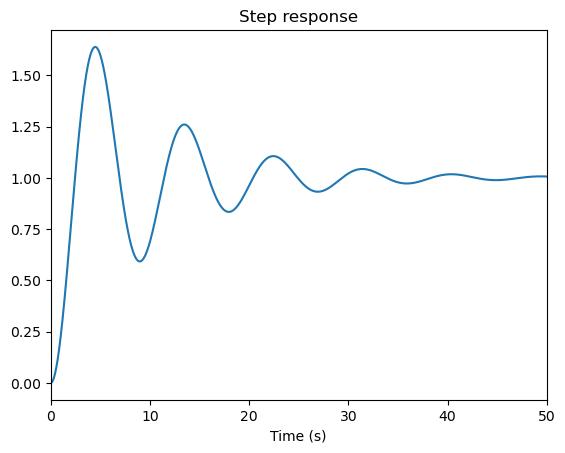

In [13]:
# set system parameters
J = 10
k = 5
b = 2

# construct arrays to define numerator and denominator. Use powers of s: a_3s^3 + a_2s^2 + a_1s + a_0 
# corresponds to array: [a_3, a_2, a_1, a_0]
num = np.array([k])
den = np.array([J, b, k]) 
G = ct.tf(num,den)
print(G)

# generate the data
N = 10000   #number of points
Tf = 50     #time in seconds of simulation
t = np.linspace(0,Tf,N)

step_data = ct.step_response(G,T=t)

fig, ax = plt.subplots(1,1)
ax.plot(t,np.squeeze(step_data.y), label='Step Response')
ax.set_title(r'Step response')
ax.set_xlabel('Time (s)')
ax.set_xlim(t[0], t[-1])

### Characteristics of a step response (Transient Response)

![Step Response Characteristics](step-response.png "Step Response Characteristics")

### Generate annotated plots

Rise Time = 0.24802480248024805s
Peak Time = 0.7060706070607061s
Peak Overshoot = 70.23053169250488%
Settling Time = 7.8267826782678265s


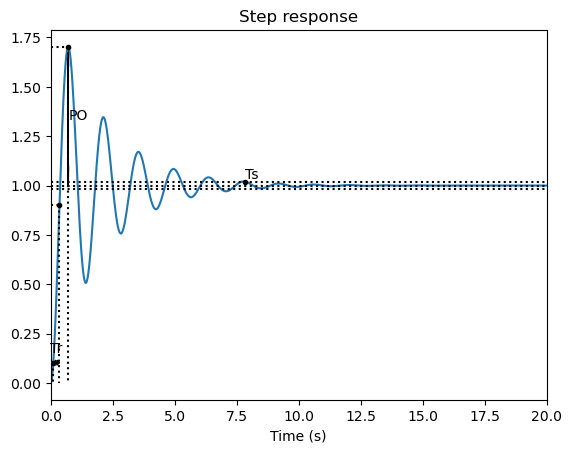

In [5]:
# set system parameters
J = 1 
k = 20
b = 1

# construct arrays to define numerator and denominator. Use powers of s: a_3s^3 + a_2s^2 + a_1s + a_0 
# corresponds to array: [a_3, a_2, a_1, a_0]
num = np.array([k])
den = np.array([J, b, k, 0])

# generate the data
N = 10000   #number of points
Tf = 20     #time in seconds of simulation
t = np.linspace(0,Tf,N)

fig, ax, theta_2 = eu.enel441_step_response(num, den, t)
rise_time = eu.enel441_rise_time(t, theta_2, ax)
peak_time, peak_overshoot = eu.enel441_peak_overshoot(t, theta_2, ax)
settling_time = eu.enel441_settling_time(t, theta_2, ax)

print('Rise Time = ', rise_time, 's', sep='' )
print('Peak Time = ', peak_time, 's', sep='' )
print('Peak Overshoot = ', peak_overshoot, '%', sep='' )
print('Settling Time = ', settling_time, 's', sep='' )

### Second Type of Plot we will use: S-Plane Plot

We have determined that the poles are very important. So we want to have a plot to visualize the poles and zeros and be able to infer some of the effects of the pole locations. 

Consider the following second order transfer function:
$$
G(s) = \frac{1}{(s + \alpha + j\beta)(s+\alpha - j\beta)}
$$
The poles of $G(s)$ are: 
$$
p =-\alpha \pm j \beta
$$

Recall poles/zeros can be real or imaginary. 

### Second Type of Plot we will use: S-Plane Plot
Idea: create a plot with
- real parts of the poles/zeros along x-axis
- imaginary parts of the poles/zeros along y-axis

### Visualizing characteristics of the step Response on the S-Plane Plot

Select a set of systems, with poles along a vertical line in the s-plane. Make sure you pick a vertical line that ends up with stable systems. Plot the step-responses of each system on the same plot. What do you notice about the step responses? 

In [ ]:
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="constant alpha.mp4" type="video/mp4">
</video></div>""")

### What do we see? 

### What characteristic of the step response stays the same? 

### Does this match the equations derived during the videos?

### The formula

In the videos it is shown that 
$$
T_s = \frac{4}{\alpha}
$$
In otherwords, all systems with the same $\alpha$ (real part of the poles) will have the same settling time. 

### Simulation 2

Now, select a set of systems with poles along a horizontal line in the s-plane. Make sure you pick a line that ends up with stable systems. Plot the step-responses of each system on the same plot. What do you notice about the step responses? 

In [15]:
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="constant beta.mp4" type="video/mp4">
</video></div>""")

### What do we observe? 

### What characteristic of the step reponse stays the same?

### Does this match what we learned in the video?

### The Formula

In the videos it is shown that 
$$
T_p = \frac{\pi}{\beta}
$$
In otherwords, all systems with the same $\beta$ (imaginary part of the poles) will have the same peak time. 

# Simulation 3

In [16]:
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="constant slope.mp4" type="video/mp4">
</video></div>""")

### What do we observe? 

### What characteristic of the step reponse stays the same?

### Does this match what we learned in the video?

### The Formula

In the videos it is shown that 
$$
P.O. = 100e^{-\frac{\alpha}{\beta}\pi}
$$
In otherwords, all systems with the same ratio of $\alpha$ and $\beta$ (real and imaginary part of the poles respectively) will have the same percent overshoot. 

### Insights
- The poles of a system have a strong effect on the transient response of a system
- There are pole patterns in the s-plane that can help us to estimate some characteristics of the transient response (is it fast or slow, highly occiliatory or not?)

This is important, because sometimes requirements of a control system are stated in terms of rise time, settling time and/or maximum overshoot. 

For second order systems, we have mapped these requirements to an area in the s-plane. Thus we know that any system within a certain area will meet the specified requirements! 

In a few weeks, we will be using controllers to "place" the poles of a system anywhere in the s-plane. Now we know where we want to place them!



### In Class Activity
Place a pole in the right half plane. What happens to the step response? What looks different? Can we explain what is happening here? Think about how a pole appears in the time domain.

This is called an unstable pole.

Text(0.5, 0, 'Time (s)')

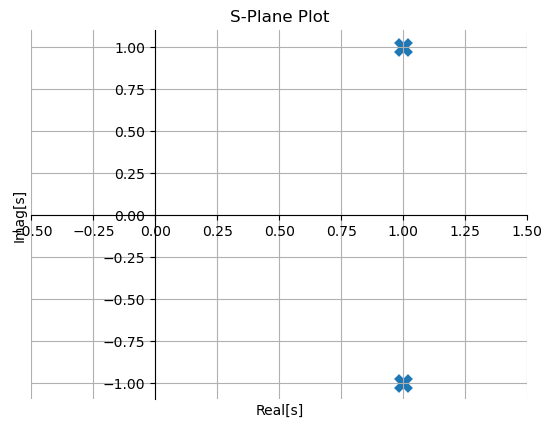

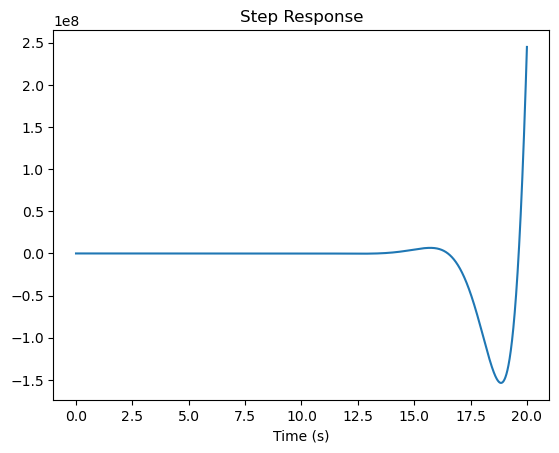

In [4]:
import enel441_utilities as eu
import numpy as np
import control as ct



# set up transfer function 
p1 = 1+1j
roots1 = np.array([p1, np.conjugate(p1)])
den1 = eu.roots_to_polynomial(roots1)
num1 = np.array([1])
num1 = num1*den1[-1]/num1[-1]
sys1 = ct.tf(num1,den1)


# calculate step responses
N = 10000   #number of points
Tf = 20     #time in seconds of simulation
t = np.linspace(0,Tf,N)
t,y = ct.step_response(sys1,T=t)


# Make s-plane plot
eu.enel441_s_plane_plot(num1, den1) 

# plot step response
fig,ax=plt.subplots(1)
ax.plot(t,y)
ax.set_title('Step Response')
ax.set_xlabel('Time (s)')


### Can we Explain What is Happening Here?

Why is the step response tending to $\infty$?

Hint: how are poles related to the solution to the differential equation?

### Higher Order Systems

The equations we derived for $T_s$, $T_p$ and $P.O.$ only hold for second order systems in the form
$$
G(s) = \frac{\alpha^2+\beta^2}{(s+\alpha+j\beta)(s+\alpha-j\beta)}
$$
Many systems are higher order... What now?

The formulas act as guidelines only.

### Dominant Poles

"Slowest" poles ususally dominate the response.
Consider a system with poles $p_1=\alpha_1\pm j \beta_1, \ldots, p_n = \alpha_n \pm j \beta_n$. 

Could approximate settling time as 
$$
T_s \approx \frac{4}{\min(\alpha_1, \ldots, \alpha_n)}
$$

Could approximate peak time as 
$$
T_p \approx \frac{\pi}{\min(\beta_1, \ldots, \beta_n)}
$$

Could approximate percent overshoot as 
$$
P.O. \approx 100e^{-min(\frac{\alpha_1}{\beta_1},\ldots,\frac{\alpha_n}{\beta_n})\pi}
$$



### Example

Consider a system with 4 poles:
$$
G(s) = \frac{1}{(s+0.5+j)(s+0.5-j)(s+4+2j)(s+4-2j)}.
$$
Settling time:
$$
T_s \approx \frac{4}{0.5} = 8s
$$
Peak time:
$$
T_p \approx \frac{\pi}{1} = 3.14s
$$
Percent Overshoot:
$$
P.O. \approx 100e^{-0.5 \pi} = 20.78
$$


System 1: 
                25
-----------------------------------
s^4 + 9 s^3 + 29.25 s^2 + 30 s + 25

System 2: 
     1.25
--------------
s^2 + s + 1.25

System 3: 
      20
--------------
s^2 + 8 s + 20



Text(0.5, 0, 'Time (s)')

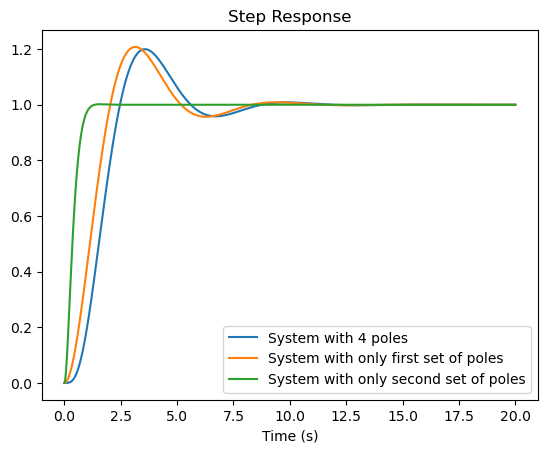

In [5]:
import enel441_utilities as eu
import numpy as np
import control as ct
import matplotlib.pyplot as plt

# Choose two sets of complex poles
p1 = -0.5+1j
p3 = -4+2j

# Convert poles to a polynomial
# System 1 has all four poles
roots1 = np.array([p1, np.conjugate(p1), p3, np.conjugate(p3)])
den1 = eu.roots_to_polynomial(roots1)
num1 = np.array([1])
num1 = num1*den1[-1]/num1[-1]
sys1 = ct.tf(num1,den1)
print('System 1:', sys1)

# System 2 has only the poles p1 and p1* 
# (for comparison to system 1)
roots2 = np.array([p1, np.conjugate(p1)])
den2 = eu.roots_to_polynomial(roots2)
num2 = np.array([1])
num2 = num2*den2[-1]/num2[-1]
sys2 = ct.tf(num2,den2)
print('System 2:', sys2)

# System 3 has only the poles p3 and p3*
# (for comparison to system 1)
roots3 = np.array([p3, np.conjugate(p3)])
den3 = eu.roots_to_polynomial(roots3)
num3 = np.array([1])
num3 = num3*den3[-1]/num3[-1]
sys3 = ct.tf(num3,den3)
print('System 3:', sys3)

# calculate step responses
N = 10000   #number of points
Tf = 20     #time in seconds of simulation
t = np.linspace(0,Tf,N)

t,y1 = ct.step_response(sys1,T=t)
t,y2 = ct.step_response(sys2,T=t)
t,y3 = ct.step_response(sys3,T=t)

fig,ax = plt.subplots(1)
ax.plot(t,y1,label='System with 4 poles')
ax.plot(t,y2,label='System with only first set of poles')
ax.plot(t,y3,label='System with only second set of poles')
ax.legend()
ax.set_title('Step Response')
ax.set_xlabel('Time (s)')


### What about zeros?

We have learned that the poles of a system are directly related to the decay rate of the exponentials in the step response.

But what is the physical meaning of the zeros? What is the effect of zeros on the step response?

### Recall Partial Fraction Expansion

The step response for an $n$ th order system is:
$$
\begin{align*}
\frac{(s+z_1)\cdots (s+z_n)}{(s+p_1)\cdots (s+p_k)}\frac{1}{s} = \frac{c_0}{s} + \sum_k^n \frac{c_k}{s+p_k},
\end{align*}
$$
where
- $\frac{1}{s}$ is the response due to the step,
- $z_1, z_2, \ldots$ are the zeros of the transfer function (can be complex),
- $p_1, p_2, \ldots$ are the poles of the transfer function (can be complex),
- $c_1, c_2, \ldots$ are the coefficients of the partial fraction expansion (can be complex).

Note: if $c_1$, $c_2$, $\ldots$ are complex, then they always appear in complex conjugate pairs. Same for the poles. 




### Recall Partial Fraction Expansion
Taking inverse Laplace transform:
$$
\begin{align*}
c(t) &= c_01(t) + \sum_{k=0}^{n-1} c_k e^{-p_kt} 1(t)  \\
\end{align*}
$$
Where did the zeros go?

### The zeros of a transfer function affect the magnitude of the coefficients $c_k$

- Placing a zero close to a pole reduces the magnitude of the partial fraction expansion coefficient. 

- In other words: 

### a zero close to a pole reduces the dominance of that pole.

Can we reason this?



### Reasoning 

Consider a transfer function
$$
G(s) = \frac{(s+z_1)}{(s+p_1)(s+p_2)}
$$
If the zero is equal to the pole ($z_1=p_1$), then there is a pole zero cancellation and the transfer function is equal to
$$
G(s) = \frac{0}{s+p_1} + \frac{1}{s+p_2}
$$

So a zero ($z_1$) that is exactly on top of a pole, completely eliminates the effect (dominance) of that pole ($p_1$). 

### What if the zero is just close to a pole?

Consider a second order transfer function:
$$
G(s) = \frac{s+z_1}{(s+p_1)(s+p_2)} = \frac{c_1}{s + p_1} + \frac{c_2}{s + p_2}
$$
The coefficients $c_1$ and $c_2$ can be solved for (partial fraction expansion method):

1. Multiply both sides of equality by the denominator:
$$
s + z_1 = c_1(s+p_2) + c_2(s+p_1).
$$

### What if the zero is just close to a pole?
2. To find $c_1$, let $s=-p_1$:
$$
\begin{align*}
-p_1+z_1 &= c_1(-p_1+p_2)  \\
c_1 &= \frac{-p_1+z_1}{-p_1+p_2}
\end{align*}
$$
3. To find $c_2$, let $s=-p_2$:
$$
\begin{align*}
-p_2+z_1 &= c_2(-p_2+p_1)  \\
c_2 &= \frac{-p_2+z_1}{-p_2+p_1}
\end{align*}
$$

Observations
- if $z_1$ is close to $p_1$, then $c_1$ will be small, because $-p_1+z_1$ will be small. Dominance of $p_1$ is reduced.
- if $z_1$ is close to $p_2$, then $c_2$ will be small (dominance of $p_2$ is reduced). 

### Visualize the effect of zeros that are close to poles

In [6]:
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="effect of zeros.mp4" type="video/mp4">
</video></div>""")

### Interesting - we have gained some insight into the significance of zeros!

We have learned how zeros affect the behavior of the system! Zeros exert their influence by modifying the coefficients of the exponential terms (whose shape is determined by the poles). 

We gained this insight by looking at the s-plane plot, and connected it to the coefficients of the partial fraction expansion! That is a non-trivial connection. 

### In Class Activity
Place a zero in the right half plane. What happens to the step response? What looks different?

This is called a non-minimum phase zero. 

Text(0.5, 0, 'Time (s)')

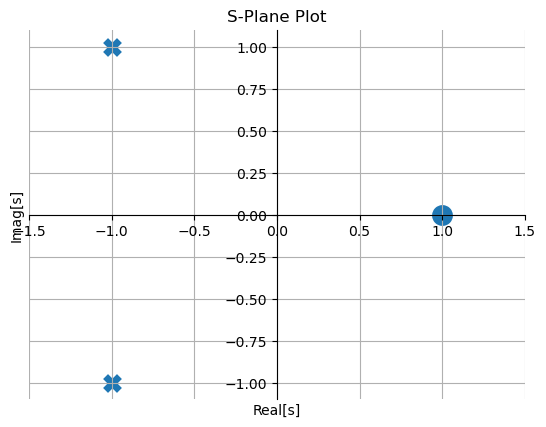

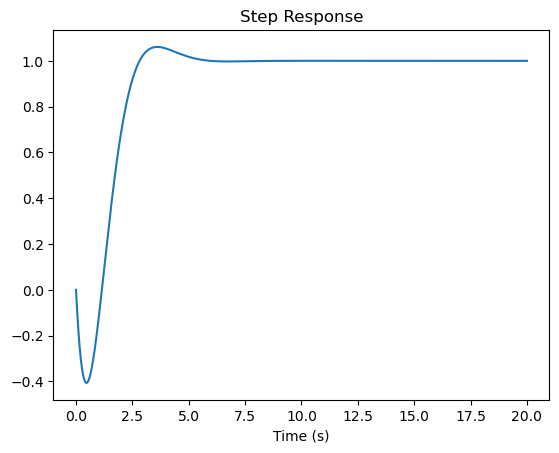

In [7]:
import enel441_utilities as eu
import numpy as np
import control as ct
import matplotlib.pyplot as plt


p1 = -1+1j
roots1 = np.array([p1, np.conjugate(p1)])
den1 = eu.roots_to_polynomial(roots1)
num1 = np.array([1, -1])
num1 = num1*den1[-2]/num1[-1]
P = ct.tf(num1,den1)


# calculate step responses
N = 10000   #number of points
Tf = 20     #time in seconds of simulation
t = np.linspace(0,Tf,N)
t,y = ct.step_response(P,T=t)


eu.enel441_s_plane_plot(num1, den1)

fig,ax = plt.subplots(1)
ax.plot(t,y)
ax.set_title('Step Response')
ax.set_xlabel('Time (s)')

### Final Value Theorem

It will often we very helpful to calculate the final value that the step response settles to. We can use a handy formula to calculate this value directly from the transfer function:
$$
f(\infty) = \lim_{t\to \infty}f(t) = \lim_{s\to 0}sF(s)
$$

### Example

At what value does the step response of $G(s) = \frac{2}{s+3}$ settle?





### Time domain solution

Step response of $G(s)$ is
$$
Y(s) = G(s)U(s) = G(s)\frac{1}{s}.
$$
Calculate partial fraction expansion:
$$
Y(s) = -\frac{2}{3}\frac{1}{s+3} + \frac{2}{3}\frac{1}{s}
$$
Inverse Laplace transform:
$$
y(t) = -\frac{2}{3}e^{-3t}1(t) + \frac{2}{3}1(t)
$$
Take limit as $t\to \infty$:
$$
y(\infty) = \frac{2}{3}
$$

### Laplace Domain Solution
Using the formula, we can also calculate the settling value in Laplace domain:
$$
\begin{align*}
y(\infty) &= \lim_{s\to 0}sY(s) \\
&= \lim_{s\to 0}sG(s)U(s) \\
&=\lim_{s\to 0}s\frac{2}{s+3}\frac{1}{s} \\
&=\frac{2}{3}
\end{align*}
$$

### Simulate system for a given input

Now we want to be able to simulate the response of the system to any input. 

This becomes tedious using Laplace transforms. Luckily, there are built-in functions in python that can help us!


### In Class Activity!
- Look at response of multi-sines, ramps, triangle waves, noise + pulse, noise + sinusoid, others?
- Try different system parameters



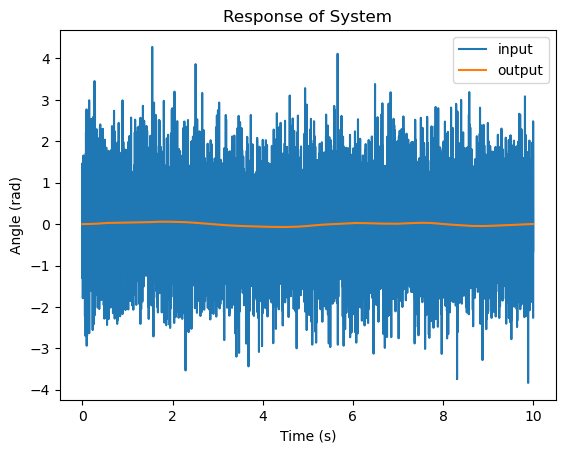

In [2]:
import math
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# set system parameters
J = 1 
k = 2
b = 1

den_sys = np.array([J, b, k])
num_sys = np.array([k])

N = 10000
dt = 1/1000
t = np.linspace(0,dt*N,N)

# make a step input
u_step = np.ones((N))

# make a rectangular pulse input
n_pulse = 1000     #width of pulse in number of steps of size dt
u_pulse = np.zeros(N)
u_pulse[0:n_pulse] = np.ones((n_pulse))

# make an input that is a single sinusoid
f = 1   #frequency of sinusoid
theta = math.pi/6
u_sinusoid = np.sin(2*math.pi*f*t + theta)

# make an input that is random
u_rand = np.random.randn(N)

# simulate the system output for selected input signal (note initial conditions are assumed to be zero)
u = u_rand
tout, yout, xout = sp.signal.lsim((num_sys,den_sys),U=u,T=t)

# plot the response
fig, ax = plt.subplots(1,1)
ax.plot(t, u, label='input')
ax.plot(tout, yout, label='output')
ax.set_title('Response of System')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Angle (rad)')
plt.legend()

plt.show()

### Observations
- What do you notice about the sinusoidal inputs?


### In this part we learned about
- how to model a system using a transfer function
- how poles are related to the time domain representation of a system
- step response 
- how poles/zeros affect the step response
- minimum phase zeros
- unstable poles